In [1]:
from getdata import GetDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data,target = GetDataset(CreateDataFrame=True).Outputdata()

In [3]:
x = np.linspace(data[0][0].min(),data[0][0].max(),901)
data2 = np.zeros((data.shape[0],901))
for i in range(data.shape[0]):
    data2[i,:] = np.interp(x,data[i][0],data[i][1])

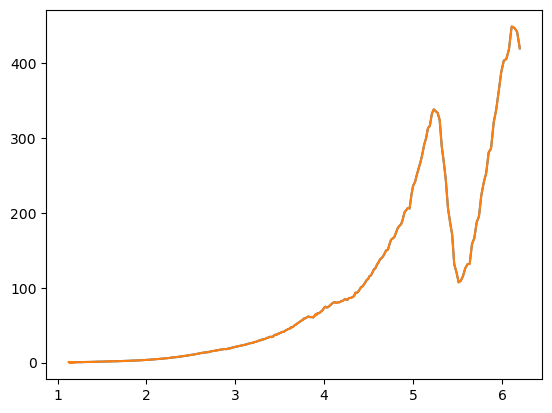

In [4]:
plt.plot(x,data2[600])
plt.plot(data[600][0],data[600][1])

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error, max_error

Scorer

In [6]:
MSE_scorer = make_scorer(mean_squared_error,greater_is_better=False)

In [7]:
def TranformData(data):
    datatrans = np.zeros((data.shape[0],12))
    for i,element in enumerate(data):
        # 1. Valor máximo de la curva
        valor_maximo = np.max(element)
        # 2. Área bajo la curva (usando la regla del trapecio)
        area_bajo_curva = np.trapz(element)

        # 3. Tiempo de subida
        tiempo_de_subida = np.argmax(element)

        # 4. Tiempo de decaimiento
        tiempo_de_decaimiento = len(element) - tiempo_de_subida

        # 5. Tiempo medio de vida
        tiempo_medio_vida = (tiempo_de_subida + tiempo_de_decaimiento) / 2

        # 6. Pendiente máxima
        pendiente_maxima = np.max(np.gradient(element))

        # 7. Pendiente mínima
        pendiente_minima = np.min(np.gradient(element))

        # 8. Pendiente promedio
        pendiente_promedio = np.mean(np.gradient(element))


        # 9. Valor medio
        valor_medio = np.mean(element)

        # 10. Desviación estándar
        desviacion_estandar = np.std(element)

        # 11. Asimetría
        asimetria = np.mean((element - valor_medio) ** 3) / (np.std(element) ** 3)

        # 12. Curtosis
        curtosis = np.mean((element - valor_medio) ** 4) / (np.std(element) ** 4)

        dat = np.array([valor_maximo,area_bajo_curva,tiempo_de_subida,tiempo_de_decaimiento,tiempo_medio_vida,pendiente_maxima,pendiente_minima,pendiente_promedio,valor_medio,desviacion_estandar,asimetria,curtosis]).reshape(1,12)
        datatrans[i,:] = dat[:]
    columns = ['Valor_Maximo','ABC','Timp_Subida','Timp_Bajada','Timp_Med','Pendiente_Max','Pendiente_Min','Pendiente_Med','Valor_Medio','Desv_est','Asimetria','Curtosis']
    datat = pd.DataFrame(datatrans,columns=columns)
    return datat

new_data_frame = TranformData(data2)
new_data_array = np.array(new_data_frame)

In [25]:
new_data_frame.describe()

,Valor_Maximo,ABC,Timp_Subida,Timp_Bajada,Timp_Med,Pendiente_Max,Pendiente_Min,Pendiente_Med,Valor_Medio,Desv_est,Asimetria,Curtosis
count,3090.000000,3.090000e+03,3090.000000,3090.000000,3090.0,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000
mean,1202.183193,3.662693e+05,751.368285,149.631715,450.5,40.197848,-44.595393,0.786947,406.911891,382.481104,0.671907,2.608289
std,1001.713605,3.159178e+05,89.153203,89.153203,0.0,163.138313,121.380720,0.696142,350.908656,326.911142,0.610922,7.755203
min,16.068455,2.896662e+03,0.000000,1.000000,450.5,0.264611,-4529.952143,-2.117993,3.242831,3.552618,-0.210522,1.282336
25%,533.233176,1.359099e+05,705.000000,169.000000,450.5,9.284539,-49.652105,0.397551,151.137491,156.776614,0.408608,1.656719
50%,909.313800,2.757352e+05,713.000000,188.000000,450.5,19.219254,-24.893552,0.611389,306.543135,280.524811,0.485585,1.873081
75%,1628.887150,5.225830e+05,732.000000,196.000000,450.5,41.592740,-13.402031,0.958095,580.429303,530.057951,0.706357,2.393365
max,9702.678349,3.067414e+06,900.000000,901.000000,450.5,7282.490662,-0.014624,8.420333,3407.538707,3080.809199,16.942606,416.819460


Lista completa de caracteristica (12)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(new_data_array, target, test_size=0.2, random_state=42, shuffle=True)


In [47]:
model_DT = DecisionTreeRegressor(max_depth=10,min_samples_split=2,min_samples_leaf=8,max_features=None) #0.2766
model_DT.fit(X_train, y_train).predict(X_test)

In [21]:
model_RF = RandomForestRegressor(n_estimators=300,max_depth=20,min_samples_leaf=2,min_samples_split=2,max_features=None) #0.206
model_RF.fit(X_train, y_train).predict(X_test)

Mejores parámetros: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 800}
Mejor puntaje: 0.20621006625295496


In [27]:
model_mlp = MLPRegressor(max_iter=1000,activation='logistic',hidden_layer_sizes=(250,),solver='adam',learning_rate='adaptive') #0.423
model_mlp.fit(X_train, y_train).predict(X_test)


Mejores parámetros: {'activation': 'logistic', 'hidden_layer_sizes': (250,), 'learning_rate': 'adaptive', 'solver': 'adam'}
Mejor puntaje: 0.4239934609913896


Extracción de caracteristica

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
import visuals as vs
min_data = MinMaxScaler().fit_transform(new_data_array)
pt_data = PowerTransformer(method='yeo-johnson').fit_transform(min_data)
X_train2, X_test2, y_train2, y_test2 = train_test_split(pt_data, target, test_size=0.2, random_state=42, shuffle=True)

In [9]:
pca = PCA(n_components=2)
id = pca.fit_transform(X_train2)
X_test2_pca = pca.transform(X_test2)

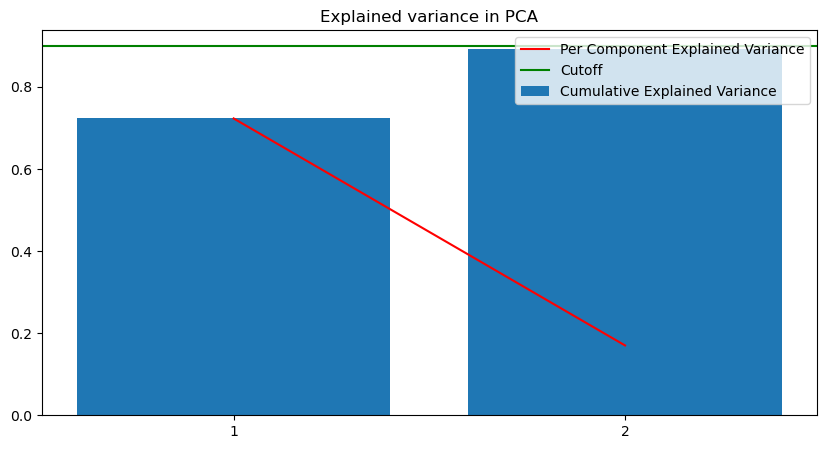

In [120]:
plt.figure(figsize=(10,5))
plt.plot(range(1,3),pca.explained_variance_ratio_, c='red', label='Per Component Explained Variance')
plt.bar(range(1,3), height=np.cumsum(pca.explained_variance_ratio_), label='Cumulative Explained Variance')
plt.axhline(y=0.9, c='g', label='Cutoff')
plt.title('Explained variance in PCA')
plt.xticks(range(1,3))
plt.legend(loc=1)
plt.show()

,Explained Variance,Valor_Maximo,ABC,Timp_Subida,Timp_Bajada,Timp_Med,Pendiente_Max,Pendiente_Min,Pendiente_Med,Valor_Medio,Desv_est,Asimetria,Curtosis
Dimension 1,0.7232,0.3378,0.3479,-0.2441,0.2420,-0.0,0.3229,-0.3240,0.2558,0.3479,0.3437,-0.2444,-0.2704
Dimension 2,0.1701,-0.1885,-0.0845,-0.4691,0.4694,-0.0,-0.2162,0.1857,-0.4034,-0.0848,-0.1459,-0.3870,-0.3078


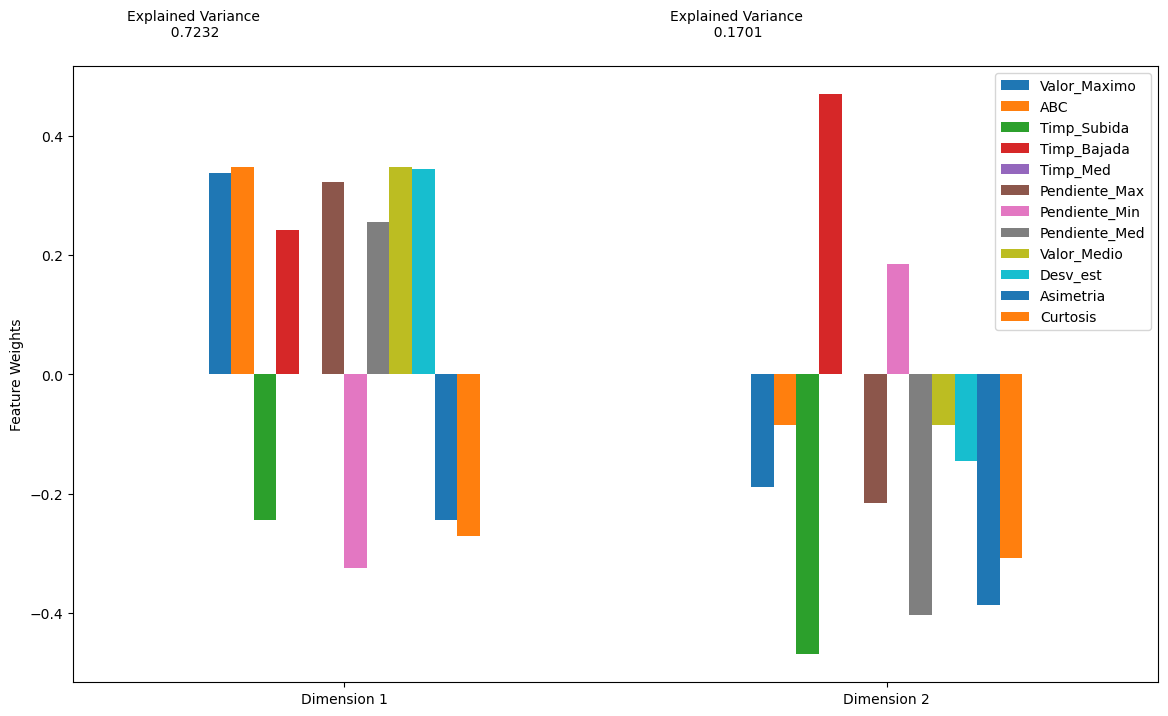

In [121]:
vs.pca_results(pd.DataFrame(pt_data,columns=new_data_frame.columns),pca,2)

In [12]:
model_DT = DecisionTreeRegressor(max_depth=4,max_features=None,min_samples_leaf=4,min_samples_split=10) #0.360
y_pred = model_DT.fit(id, y_train2).predict(X_test2_pca)


data_model_DT = {'Model': 'DecisionTreeRegressor',
              'MSE': mean_squared_error(y_pred=y_pred,y_true=y_test2),
              'RMSE': np.sqrt(mean_squared_error(y_pred=y_pred,y_true=y_test2)),
              'MAE': mean_absolute_error(y_pred=y_pred,y_true=y_test2),
              'R2': r2_score(y_pred=y_pred,y_true=y_test2),
              'Max_Error': max_error(y_pred=y_pred,y_true=y_test2)}


print("MAE:", mean_absolute_error(y_pred=y_pred,y_true=y_test2))
print("MSE:",mean_squared_error(y_pred=y_pred,y_true=y_test2))
print("RMSE:",np.sqrt(mean_squared_error(y_pred=y_pred,y_true=y_test2)))
print("R2:",r2_score(y_pred=y_pred,y_true=y_test2))
print("Max_Error:",max_error(y_pred=y_pred,y_true=y_test2))

MAE: 0.506402251826251
MSE: 0.3434017695382423
RMSE: 0.5860049227935226
R2: 0.2344229472723428
Max_Error: 2.260666666666667


In [14]:
"""
model_RF = RandomForestRegressor()

random_forest_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [0,42,123]
}

# Realizar la búsqueda de hiperparámetros
grid_search_RF = RandomizedSearchCV(model_RF, random_forest_params, cv=5, scoring=MSE_scorer,n_jobs=-1,n_iter=300)
grid_search_RF.fit(id, y_train2)

results = grid_search_RF.cv_results_
# Mostrar los mejores parámetros y el mejor score
print("Mejores parámetros:", grid_search_RF.best_params_)
print("Mejor puntaje:", -grid_search_RF.best_score_)
"""

Mejores parámetros: {'random_state': 42, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
Mejor puntaje: 0.3454361537003498


In [16]:
model_RF = RandomForestRegressor(n_estimators=100,max_depth=10,min_samples_split=3,min_samples_leaf=1,max_features='sqrt')
y_pred = model_RF.fit(id, y_train2).predict(X_test2_pca)


data_model_RF = {'Model': 'RandomForestRegressor',
              'MSE': mean_squared_error(y_pred=y_pred,y_true=y_test2),
              'RMSE': np.sqrt(mean_squared_error(y_pred=y_pred,y_true=y_test2)),
              'MAE': mean_absolute_error(y_pred=y_pred,y_true=y_test2),
              'R2': r2_score(y_pred=y_pred,y_true=y_test2),
              'Max_Error': max_error(y_pred=y_pred,y_true=y_test2)}


print("MAE:", mean_absolute_error(y_pred=y_pred,y_true=y_test2))
print("MSE:",mean_squared_error(y_pred=y_pred,y_true=y_test2))
print("RMSE:",np.sqrt(mean_squared_error(y_pred=y_pred,y_true=y_test2)))
print("R2:",r2_score(y_pred=y_pred,y_true=y_test2))
print("Max_Error:",max_error(y_pred=y_pred,y_true=y_test2))

MAE: 0.48153334528430103
MSE: 0.3264888791775734
RMSE: 0.5713920538278192
R2: 0.27212840456464993
Max_Error: 2.0038064552094177


In [31]:
model_mlp = MLPRegressor(max_iter=1500, hidden_layer_sizes=(100,),activation='relu',learning_rate='adaptive',solver='adam') #0.357
y_pred = model_mlp.fit(id, y_train).predict(X_test2_pca)


data_model_MLP = {'Model': 'MLPRegressor',
              'MSE': mean_squared_error(y_pred=y_pred,y_true=y_test2),
              'RMSE': np.sqrt(mean_squared_error(y_pred=y_pred,y_true=y_test2)),
              'MAE': mean_absolute_error(y_pred=y_pred,y_true=y_test2),
              'R2': r2_score(y_pred=y_pred,y_true=y_test2),
              'Max_Error': max_error(y_pred=y_pred,y_true=y_test2)}


print("MAE:", mean_absolute_error(y_pred=y_pred,y_true=y_test2))
print("MSE:",mean_squared_error(y_pred=y_pred,y_true=y_test2))
print("RMSE:",np.sqrt(mean_squared_error(y_pred=y_pred,y_true=y_test2)))
print("R2:",r2_score(y_pred=y_pred,y_true=y_test2))
print("Max_Error:",max_error(y_pred=y_pred,y_true=y_test2))

MAE: 0.5071495443138804
MSE: 0.3489588243942749
RMSE: 0.5907273689226485
R2: 0.22203409533297158
Max_Error: 2.2774095164233463


In [32]:
model_linear = LinearRegression(fit_intercept=True,n_jobs=-1,copy_X=True) #0.391
y_pred = model_linear.fit(id, y_train).predict(X_test2_pca)

data_model_LN = {'Model': 'LinearRegression',
              'MSE': mean_squared_error(y_pred=y_pred,y_true=y_test2),
              'RMSE': np.sqrt(mean_squared_error(y_pred=y_pred,y_true=y_test2)),
              'MAE': mean_absolute_error(y_pred=y_pred,y_true=y_test2),
              'R2': r2_score(y_pred=y_pred,y_true=y_test2),
              'Max_Error': max_error(y_pred=y_pred,y_true=y_test2)}


print("MAE:", mean_absolute_error(y_pred=y_pred,y_true=y_test2))
print("MSE:",mean_squared_error(y_pred=y_pred,y_true=y_test2))
print("RMSE:",np.sqrt(mean_squared_error(y_pred=y_pred,y_true=y_test2)))
print("R2:",r2_score(y_pred=y_pred,y_true=y_test2))
print("Max_Error:",max_error(y_pred=y_pred,y_true=y_test2))

MAE: 0.5427116533094678
MSE: 0.390235553252632
RMSE: 0.6246883649089616
R2: 0.1300120988589536
Max_Error: 2.6488097759305704


In [33]:
model_SVR = SVR(kernel='rbf',gamma='auto',C=5,epsilon=0.5,tol=0.1)
y_pred = model_SVR.fit(id, y_train).predict(X_test2_pca)

data_model_SVR = {'Model': 'SVR',
              'MSE': mean_squared_error(y_pred=y_pred,y_true=y_test2),
              'RMSE': np.sqrt(mean_squared_error(y_pred=y_pred,y_true=y_test2)),
              'MAE': mean_absolute_error(y_pred=y_pred,y_true=y_test2),
              'R2': r2_score(y_pred=y_pred,y_true=y_test2),
              'Max_Error': max_error(y_pred=y_pred,y_true=y_test2)}


print("MAE:", mean_absolute_error(y_pred=y_pred,y_true=y_test2))
print("MSE:",mean_squared_error(y_pred=y_pred,y_true=y_test2))
print("RMSE:",np.sqrt(mean_squared_error(y_pred=y_pred,y_true=y_test2)))
print("R2:",r2_score(y_pred=y_pred,y_true=y_test2))
print("Max_Error:",max_error(y_pred=y_pred,y_true=y_test2))

MAE: 0.5213097557759725
MSE: 0.3452885840740575
RMSE: 0.5876126139507707
R2: 0.23021649861799998
Max_Error: 2.1439338590700063


In [34]:
model_XGBoost = GradientBoostingRegressor(loss='squared_error',
                                          learning_rate=0.01,
                                          n_estimators=200,
                                          subsample=0.1,
                                          criterion='squared_error',
                                          max_depth=25,
                                          min_samples_split=5,
                                          min_samples_leaf=2,
                                          max_features='log2')

y_pred = model_XGBoost.fit(id, y_train).predict(X_test2_pca)

data_model_GXBoost = {'Model': 'GXBoost',
              'MSE': mean_squared_error(y_pred=y_pred,y_true=y_test2),
              'RMSE': np.sqrt(mean_squared_error(y_pred=y_pred,y_true=y_test2)),
              'MAE': mean_absolute_error(y_pred=y_pred,y_true=y_test2),
              'R2': r2_score(y_pred=y_pred,y_true=y_test2),
              'Max_Error': max_error(y_pred=y_pred,y_true=y_test2)}


print("MAE:", mean_absolute_error(y_pred=y_pred,y_true=y_test2))
print("MSE:",mean_squared_error(y_pred=y_pred,y_true=y_test2))
print("RMSE:",np.sqrt(mean_squared_error(y_pred=y_pred,y_true=y_test2)))
print("R2:",r2_score(y_pred=y_pred,y_true=y_test2))
print("Max_Error:",max_error(y_pred=y_pred,y_true=y_test2))


MAE: 0.4954153678212989
MSE: 0.33323830450950553
RMSE: 0.5772679659477958
R2: 0.2570812917900882
Max_Error: 2.0038244231956615


In [51]:
metrics_general = [data_model_DT,data_model_LN,data_model_SVR,data_model_MLP,data_model_RF,data_model_GXBoost]
Metrics = pd.DataFrame(metrics_general,columns=['Model','MSE','RMSE','MAE','R2','Max_Error'])

In [52]:
Metrics

,Model,MSE,RMSE,MAE,R2,Max_Error
0,DecisionTreeRegressor,0.343402,0.586005,0.506402,0.234423,2.260667
1,LinearRegression,0.390236,0.624688,0.542712,0.130012,2.648810
2,SVR,0.345289,0.587613,0.521310,0.230216,2.143934
3,MLPRegressor,0.348959,0.590727,0.507150,0.222034,2.277410
4,RandomForestRegressor,0.328484,0.573135,0.483561,0.267680,1.973716
5,GXBoost,0.333238,0.577268,0.495415,0.257081,2.003824


In [110]:
metrics_name = []
metrics_value = []
for column in Metrics.columns[1:]:
    if column == 'R2':
        val_sorted = Metrics[column].sort_values(ascending=False)
        indices_originales = pd.Series(val_sorted.index, index=val_sorted.values)
        metrics_value.append(pd.DataFrame(np.array(val_sorted),index=None,columns=[column]))
        metrics_name.append(pd.DataFrame(np.array(Metrics.iloc[indices_originales,0]),index=None,columns=[column]))

    else:
        val_sorted = Metrics[column].sort_values(ascending=True)
        indices_originales = pd.Series(val_sorted.index, index=val_sorted.values)
        metrics_value.append(pd.DataFrame(np.array(val_sorted),index=None,columns=[column]))
        metrics_name.append(pd.DataFrame(np.array(Metrics.iloc[indices_originales,0]),index=None,columns=[column]))
Metrics_values = pd.concat(metrics_value,axis=1)
Metrics_name = pd.concat(metrics_name,axis=1)


In [111]:
Metrics_values

,MSE,RMSE,MAE,R2,Max_Error
0,0.328484,0.573135,0.483561,0.267680,1.973716
1,0.333238,0.577268,0.495415,0.257081,2.003824
2,0.343402,0.586005,0.506402,0.234423,2.143934
3,0.345289,0.587613,0.507150,0.230216,2.260667
4,0.348959,0.590727,0.521310,0.222034,2.277410
5,0.390236,0.624688,0.542712,0.130012,2.648810


In [112]:
Metrics_name

,MSE,RMSE,MAE,R2,Max_Error
0,RandomForestRegressor,RandomForestRegressor,RandomForestRegressor,RandomForestRegressor,RandomForestRegressor
1,GXBoost,GXBoost,GXBoost,GXBoost,GXBoost
2,DecisionTreeRegressor,DecisionTreeRegressor,DecisionTreeRegressor,DecisionTreeRegressor,SVR
3,SVR,SVR,MLPRegressor,SVR,DecisionTreeRegressor
4,MLPRegressor,MLPRegressor,SVR,MLPRegressor,MLPRegressor
5,LinearRegression,LinearRegression,LinearRegression,LinearRegression,LinearRegression


In [129]:
df_combined = pd.DataFrame()
for column in Metrics_name.columns:
    # Concatenamos los valores de las columnas de ambos DataFrames, con los valores de Metrics_name entre paréntesis
    df_combined[column] = Metrics_name[column] + ' (' + round(Metrics_values[column],3).astype(str) + ')'

# Muestra el DataFrame combinado
df_combined

,MSE,RMSE,MAE,R2,Max_Error
0,RandomForestRegressor (0.328),RandomForestRegressor (0.573),RandomForestRegressor (0.484),RandomForestRegressor (0.268),RandomForestRegressor (1.974)
1,GXBoost (0.333),GXBoost (0.577),GXBoost (0.495),GXBoost (0.257),GXBoost (2.004)
2,DecisionTreeRegressor (0.343),DecisionTreeRegressor (0.586),DecisionTreeRegressor (0.506),DecisionTreeRegressor (0.234),SVR (2.144)
3,SVR (0.345),SVR (0.588),MLPRegressor (0.507),SVR (0.23),DecisionTreeRegressor (2.261)
4,MLPRegressor (0.349),MLPRegressor (0.591),SVR (0.521),MLPRegressor (0.222),MLPRegressor (2.277)
5,LinearRegression (0.39),LinearRegression (0.625),LinearRegression (0.543),LinearRegression (0.13),LinearRegression (2.649)
